In [0]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
df = pd.read_csv("multipleChoiceResponses.csv")
gender_income_list = df.iloc[ :, [1,12]]

In [0]:
gender_income_list.head()

,Q1,Q9
0,What is your gender? - Selected Choice,What is your current yearly compensation (appr...
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN


**Question 1:**

*Calculate the median income of male employees and the median income of female employee in the population.*

In [0]:
gender_income_list.drop(0, inplace=True)

In [0]:
gender_income_list.Q9.unique()

array([nan, '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [0]:
gender_income_list["Q9"].fillna(" ", inplace = True) 
indexnames=gender_income_list[ gender_income_list['Q9'] == 'I do not wish to disclose my approximate yearly compensation'].index
gender_income_list.drop(indexnames, inplace=True)

In [0]:
indexnames=gender_income_list[ gender_income_list['Q9'] == ' '].index
gender_income_list.drop(indexnames, inplace=True)

In [0]:
mean_values = []
income_ranges = gender_income_list['Q9'].tolist()
for i in range(len(income_ranges)):
  list1 = income_ranges[i].split('-')
  if(len(list1)>1):
    mean = (int(list1[0])*1000 + int(list1[1].replace(",","")))/2
    mean_values.append(mean)
  else:
    mean_values.append(int(list1[0].replace(",","").replace("+","")))
    
gender_income_list["Mean_Values"] = mean_values

In [0]:
gender_income_list.head()

,Q1,Q9,Mean_Values
2,Male,"10-20,000",15000.0
3,Female,"0-10,000",5000.0
5,Male,"0-10,000",5000.0
7,Male,"10-20,000",15000.0
8,Male,"0-10,000",5000.0


In [0]:
male_mean = gender_income_list.loc[gender_income_list['Q1'] == 'Male']
male_mean.drop(columns=['Q9'],inplace=True)

In [0]:
female_mean = gender_income_list.loc[gender_income_list['Q1'] == 'Female'] 
female_mean.drop(columns=['Q9'],inplace=True)

In [0]:
median_value_of_male = int(male_mean.median())
median_value_of_female = int(female_mean.median())
print("Median of Male:", median_value_of_male)
print("Median of Female:", median_value_of_female)

Median of Male: 35000
Median of Female: 25000


**Question 2**

*Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population.*

In [0]:
hist_data = pd.DataFrame({'Mean_values_of_Male':male_mean['Mean_Values'],'Mean_values_of_Female':female_mean['Mean_Values'] })
hist_data.head()

,Mean_values_of_Male,Mean_values_of_Female
2,15000.0,NaN
3,NaN,5000.0
5,5000.0,NaN
7,15000.0,NaN
8,5000.0,NaN


**Question 2**

*Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population.*

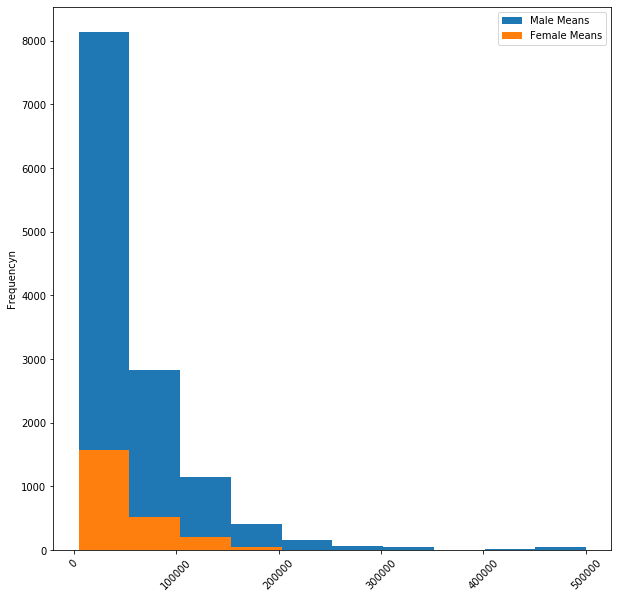

In [0]:
fig, ax = pl.subplots(figsize = (10,10))
ax.hist(male_mean["Mean_Values"], label='Male Means')
ax.hist(female_mean["Mean_Values"], label='Female Means')
pl.setp(ax.get_xticklabels(),  rotation=45)
pl.ylabel("Frequencyn")
pl.legend()
pl.show()

 # **Question 3:** 

In order to select sample from the given data set which contains overwhelmed male employees than female employees, we need to identify the ratio of male and female in the given data set such that same ratio can be used while selecting the sample randomly from the cleaned data set.

In [0]:
#Function that identifies the ratio of male and female in the given data set

def ratio_of_male_female(male_mean_df, female_mean_df):
  no_of_males = male_mean_df.shape[0]
  no_of_females = female_mean_df.shape[0]
  male_female_ratio = int(no_of_males/no_of_females)
  return male_female_ratio

In [0]:
male_and_female_ratio = ratio_of_male_female(male_mean, female_mean)
print(male_and_female_ratio)

5


In [0]:
#As ratio is 5:1 for male and female collect sample from given data set for a new sample of 500 with the same ratio 5:1.

def RatioCalcForSamples(no_of_samples):
  male_count_for_sample = (5/6)*no_of_samples
  female_count_for_sample = (1/6)*no_of_samples
  return round(male_count_for_sample),round(female_count_for_sample)


Question 3.1 :

Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed
male employees than female employees .

In [0]:
# Function that generates random sample of employees by passing the parameter as total number of employees required to be in sample.

def RandomSampleData(no_of_samples):
  male_ratio, female_ratio = RatioCalcForSamples(no_of_samples)
  male_data_sample= male_mean.sample(n = male_ratio, replace = False) 
  female_data_sample= female_mean.sample(n = female_ratio, replace = False) 
  sample_df = pd.concat([male_data_sample, female_data_sample])
  return male_data_sample,female_data_sample,sample_df

In [0]:
male_data_sample,female_data_sample,sample_df1=RandomSampleData(500)
sample_df1

,Q1,Mean_Values
3181,Male,95000.0
8145,Male,55000.0
11113,Male,25000.0
10409,Male,85000.0
5688,Male,25000.0
...,...,...
10014,Female,5000.0
5345,Female,5000.0
14366,Female,65000.0
15074,Female,5000.0


Question 3.2:

*Define test statistic, null hypothesis and alternative hypothesis.*

*Test Statistic*: Test statistic is a variable which is calculated from the given data and is used to compare with the values derived from random sampling.
The test statistic for the given population is the difference of mean values of salaries between male and employee employees.

*Null Hypothesis*: Null hypothesis indicates states that there is no difference between the distributions of salaries of males and females.

*Alternative Hypothesis*: Alternative hypothesis states that the income distribution of male employees is greater than the income distribution of female employees. And this can be justified by finding the difference of median incomes of male and female employees.



*Question 3.3:*

Draw the income histogram for the sample, calculate the median income of the sample, and draw a red
dot and a yellow dot of the female median income and male median income of the population, respectively,
in the histogram.


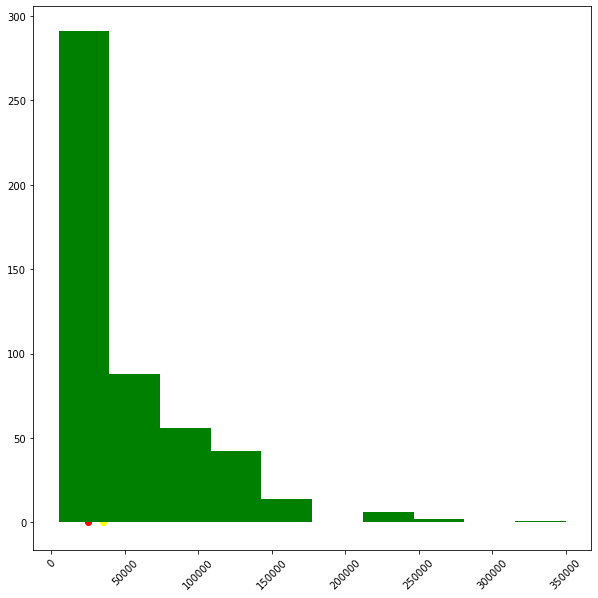

In [0]:
fig, ax = pl.subplots(figsize = (10,10))
ax.hist(sample_df1["Mean_Values"], color="green")
pl.setp(ax.get_xticklabels(),  rotation=45)
pl.scatter(median_value_of_male, 0, color='yellow')
pl.scatter(median_value_of_female, 0, color='red')
pl.show()

*Question 3.4:*

Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population (e.g. the difference of the median incomes between female and male employees)
in the diagram.


In [0]:
#In this block, test statistic of sample is calculated as difference between median incomes of male and employees
#for 5000 iterations of 500 random samples and are assigned to a list. 
#And test statistic of the population is the difference between median incomes of male and female employees.

i=1
test_statistic = []
repetitions = 5000
for i in range(repetitions):
  male_data_sample,female_data_sample,sample_df1=RandomSampleData(500)
  median_of_male_sample = int(male_data_sample.median())
  median_of_female_sample = int(female_data_sample.median())
  test_statistic_of_sample = abs(median_of_male_sample - median_of_female_sample)
  test_statistic.append(test_statistic_of_sample)

test_statistic_of_population = abs(median_value_of_male - median_value_of_female)
print("Test statistic of Sample:", test_statistic)
print("Test statistic of Population:", test_statistic_of_population)

Test statistic of Sample: [10000, 10000, 0, 10000, 0, 0, 0, 10000, 10000, 0, 10000, 10000, 0, 10000, 0, 0, 0, 0, 0, 10000, 0, 0, 0, 0, 10000, 0, 0, 0, 10000, 20000, 10000, 0, 10000, 10000, 0, 10000, 0, 10000, 10000, 0, 10000, 10000, 0, 0, 0, 0, 0, 20000, 10000, 10000, 0, 0, 0, 10000, 0, 20000, 10000, 10000, 10000, 0, 10000, 10000, 10000, 10000, 0, 0, 10000, 10000, 0, 0, 10000, 10000, 10000, 10000, 0, 10000, 10000, 20000, 10000, 0, 20000, 0, 10000, 0, 10000, 0, 10000, 0, 0, 0, 0, 10000, 10000, 10000, 0, 0, 20000, 10000, 0, 10000, 10000, 10000, 0, 10000, 10000, 20000, 20000, 10000, 20000, 10000, 10000, 10000, 10000, 10000, 10000, 0, 0, 0, 10000, 0, 10000, 10000, 0, 10000, 10000, 0, 10000, 0, 0, 10000, 10000, 10000, 10000, 0, 10000, 10000, 10000, 10000, 10000, 0, 10000, 20000, 20000, 10000, 10000, 10000, 10000, 0, 0, 0, 10000, 10000, 10000, 10000, 10000, 10000, 0, 10000, 10000, 0, 0, 10000, 10000, 0, 0, 10000, 10000, 10000, 0, 0, 10000, 0, 0, 0, 10000, 0, 0, 10000, 10000, 0, 10000, 0, 0, 

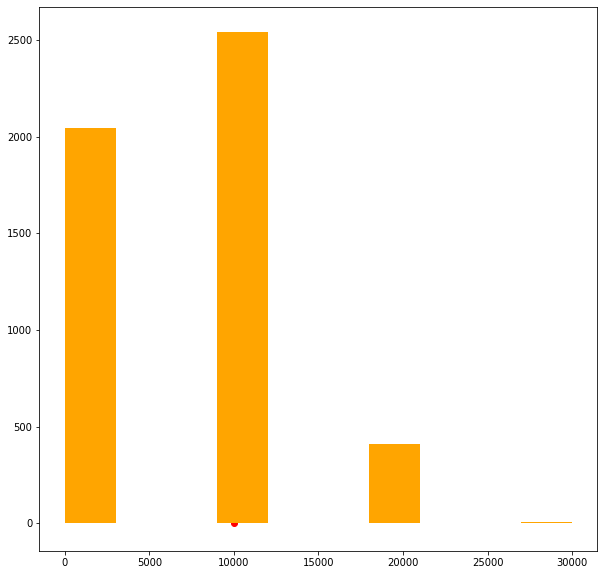

In [0]:
fig, ax = pl.subplots(figsize = (10,10))
ax.hist(test_statistic, bins=10, color="orange")
pl.scatter(test_statistic_of_population, 0, color='red')
pl.show()

*Question 3.5:*

*Write a procedure to use bootstrap to produce at least 5000 samples.*

Steps for bootstrapping:

1. Treat the original sample as if it were the population.
2. We need to generate 5000 samples data from the original given data set.
3. And then from this sample with replacement we need to generate 5000 samples, we create the possibility for the new samples to be different from the original, because some employees might be drawn more than once and others not at all.
4. By the law of averages, the distribution of the original sample is likely to resemble the population, and the distributions of all the "resamples" are likely to resemble the original sample. So the distributions of all the resamples are likely to resemble the population as well.



In [0]:
#First sample with 5000 records

male_sample_for_bootstrap, female_sample_for_bootstrap, bootstrap_sample = RandomSampleData(5000)
bootstrap_sample

,Q1,Mean_Values
621,Male,5000.0
18742,Male,5000.0
10862,Male,75000.0
5886,Male,35000.0
20359,Male,5000.0
...,...,...
4245,Female,95000.0
2737,Female,85000.0
7974,Female,25000.0
13852,Female,5000.0


In [0]:
#Function with bootstrap mechanism on a sample of 5000 drawn earlier with 5000 iterations and "with replacement TRUE"
i=1
median_bootstrap_sample=[]
def bootstrap_median(bootstrap_sample):
  for i in range(5000):
    re_sample = bootstrap_sample.sample(replace=True)
    median_resample = int(re_sample.median())
    median_bootstrap_sample.append(median_resample)
  return median_bootstrap_sample

In [0]:
medians_of_bootstrap = bootstrap_median(bootstrap_sample)
medians_of_bootstrap

[85000,
 55000,
 25000,
 112500,
 5000,
 35000,
 5000,
 5000,
 75000,
 5000,
 45000,
 35000,
 112500,
 15000,
 55000,
 175000,
 15000,
 45000,
 112500,
 225000,
 35000,
 15000,
 5000,
 5000,
 112500,
 75000,
 65000,
 5000,
 25000,
 15000,
 5000,
 5000,
 500000,
 5000,
 5000,
 112500,
 35000,
 95000,
 112500,
 75000,
 25000,
 5000,
 5000,
 15000,
 5000,
 45000,
 275000,
 5000,
 25000,
 55000,
 5000,
 5000,
 65000,
 15000,
 25000,
 5000,
 75000,
 65000,
 15000,
 65000,
 25000,
 55000,
 225000,
 45000,
 112500,
 65000,
 15000,
 5000,
 45000,
 35000,
 112500,
 5000,
 25000,
 5000,
 5000,
 25000,
 45000,
 5000,
 55000,
 5000,
 15000,
 65000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 15000,
 35000,
 5000,
 15000,
 5000,
 15000,
 25000,
 15000,
 15000,
 95000,
 225000,
 15000,
 25000,
 137500,
 5000,
 15000,
 55000,
 55000,
 5000,
 15000,
 5000,
 5000,
 5000,
 65000,
 15000,
 5000,
 5000,
 25000,
 25000,
 137500,
 55000,
 5000,
 25000,
 5000,
 45000,
 65000,
 75000,
 5000,
 25000,
 5000,
 75

*Question 3.6:*

*Draw the histogram of the test statistic of the bootstrap samples.*

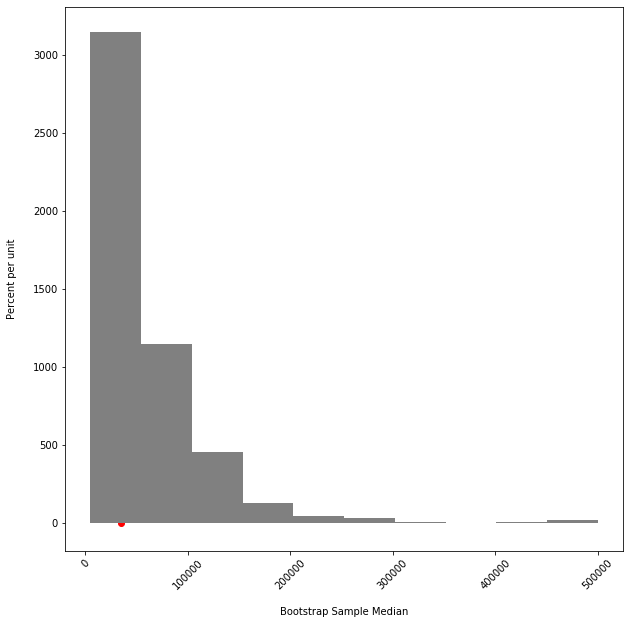

In [0]:
#Block that plots histogram of bootstrap test statistic

median_of_orig_sample = bootstrap_sample.median()
fig, ax = pl.subplots(figsize = (10,10))
ax.hist(medians_of_bootstrap, color="grey")
pl.xlabel("\nBootstrap Sample Median")
pl.ylabel("Percent per unit\n")
pl.setp(ax.get_xticklabels(),  rotation=45)
pl.scatter(median_of_orig_sample, 0, color='red')
pl.show()

*Question 3.7:*

*Define confidence interval and P-value to validate the hypothesis you defined.*

Confidence Interval: The confidence interval is 95% from the bootstrap results and can be observed in below block.

In [0]:
# Get the endpoints of the 95% confidence interval
confidence_int = []
left = np.percentile(medians_of_bootstrap, 2.5 )
right = np.percentile(medians_of_bootstrap, 97.5)
confidence_int = [left, right]
print(confidence_int)

[5000.0, 175000.0]


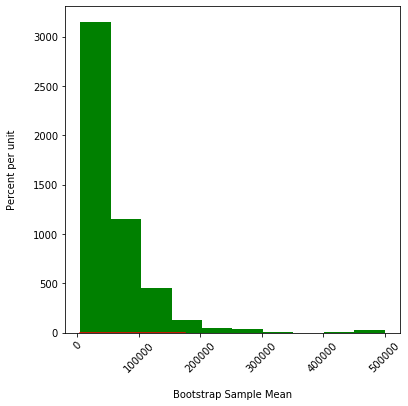

In [0]:
# Confidence Interval for bootstrap sample can be plotted on histogram from below piece of logic.

fig, ax = pl.subplots(figsize = (6,6))
ax.hist(medians_of_bootstrap, color="green")
pl.xlabel("\nBootstrap Sample Mean")
pl.ylabel("Percent per unit\n")
pl.setp(ax.get_xticklabels(), rotation=45)
pl.plot(confidence_int, (0, 0), color='red')
pl.show()

*P value to validate hypotheses.*

Null Hypothesis: As per null hypothesis, the P-value is zero and from the above confidence interval , it can be observed that that doesn't lie in it. Hence, Null hypothesis can be rejected.

Alternative Hypothesis:
As per alternative hypothesis, there is a significant difference between the distribution of incomes of male and female employees. 
And this can be justified by looking at the difference of median incomes of male and female employees. (10000)
And this P value lies in the confidence interval. Hence, Alternative Hypothesis is correct.

In [0]:
p_value =  abs(median_value_of_male-median_value_of_female)
print("P-Value of Alternative Hypothesis:", p_value)

P-Value of Alternative Hypothesis: 10000
